<a href="https://colab.research.google.com/github/VictorLoureiro/Wordle-Spanish-Predictor/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [39]:
# GET SPANISH WORDS
urlretrieve("https://raw.githubusercontent.com/VictorLoureiro/Wordle-Spanish-Predictor/main/data/spanish_5_chars_words.txt",
            "spanish_5_chars_words.txt")
words = list();
with open('spanish_5_chars_words.txt', 'r') as f:
    words = [line.strip() for line in f];
print("Number of words: "+ str(len(words)));

Number of words: 12031


In [40]:
def get_remaining_words_alphabet(remaining_words):

  SPANISH_ALPHABET_LEN = 27;
  remaining_alphabet = list();
  for word in remaining_words:
    for letter in word:
      if (len(remaining_alphabet) == SPANISH_ALPHABET_LEN):
        return sorted(remaining_alphabet);
      if letter not in remaining_alphabet:
        remaining_alphabet.append(letter);
  return sorted(remaining_alphabet);


spanish_alphabet = get_remaining_words_alphabet(words);
len(spanish_alphabet)

27

In [41]:
# COUNT SPANISH ALPHABET APPEARANCES
def get_alphabet_appearances_in_remaining_words(remaining_words, remaining_alphabet):

  remaining_alphabet_counter_dict = {};

  for letter in remaining_alphabet:
    remaining_alphabet_counter_dict[letter] = 0;
    for word in remaining_words:
      if letter in word:
        remaining_alphabet_counter_dict[letter] += 1;

  remaining_alphabet_counter_dict = sorted(remaining_alphabet_counter_dict.items(), key=lambda x: x[1], reverse=True)  
  return remaining_alphabet_counter_dict;

sorted_remaining_alphabet_counter_dict = get_alphabet_appearances_in_remaining_words(words, spanish_alphabet);
sorted_remaining_alphabet_counter_dict

[('a', 7647),
 ('o', 5117),
 ('e', 5031),
 ('s', 3908),
 ('r', 3697),
 ('i', 3631),
 ('n', 2814),
 ('l', 2723),
 ('u', 2656),
 ('c', 2414),
 ('t', 2229),
 ('d', 1713),
 ('m', 1696),
 ('p', 1668),
 ('b', 1335),
 ('g', 1133),
 ('j', 881),
 ('f', 829),
 ('h', 796),
 ('v', 722),
 ('z', 657),
 ('y', 491),
 ('ñ', 443),
 ('x', 144),
 ('q', 119),
 ('k', 52),
 ('w', 14)]

<BarContainer object of 27 artists>

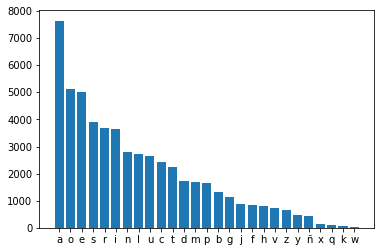

In [42]:
# SORT LETTERS BY APPEARANCE

sorted_remaining_alphabet_counter_keys = list();
sorted_remaining_alphabet_counter_values = list();

for item in sorted_remaining_alphabet_counter_dict:
  
  sorted_remaining_alphabet_counter_keys.append(item[0]);
  sorted_remaining_alphabet_counter_values.append(item[1]);

plt.bar(sorted_remaining_alphabet_counter_keys, sorted_remaining_alphabet_counter_values)

In [44]:
# GET INFORMATION GIVEN BY EACH WORD
def get_information_in_remaining_words(remaining_words, remaining_alphabet_counter_dict):

  remaining_words_information_dict = {};
  
  for word in sorted(remaining_words):
    remaining_words_information_dict[word] = 0;
    for item in remaining_alphabet_counter_dict:
      letter = str(item[0]);
      letter_counter = int(item[1]);
      if letter in word:
        remaining_words_information_dict[word] += letter_counter;

  remaining_words_information_dict = sorted(remaining_words_information_dict.items(), key=lambda x: x[1], reverse=True)  
  return remaining_words_information_dict;

sorted_remaining_words_information_dict = get_information_in_remaining_words(words, sorted_remaining_alphabet_counter_dict);
sorted_remaining_words_information_dict[:10]

[('orase', 25400),
 ('oreas', 25400),
 ('osare', 25400),
 ('osear', 25400),
 ('osera', 25400),
 ('rosea', 25400),
 ('seora', 25400),
 ('aireo', 25123),
 ('asone', 24517),
 ('osean', 24517)]

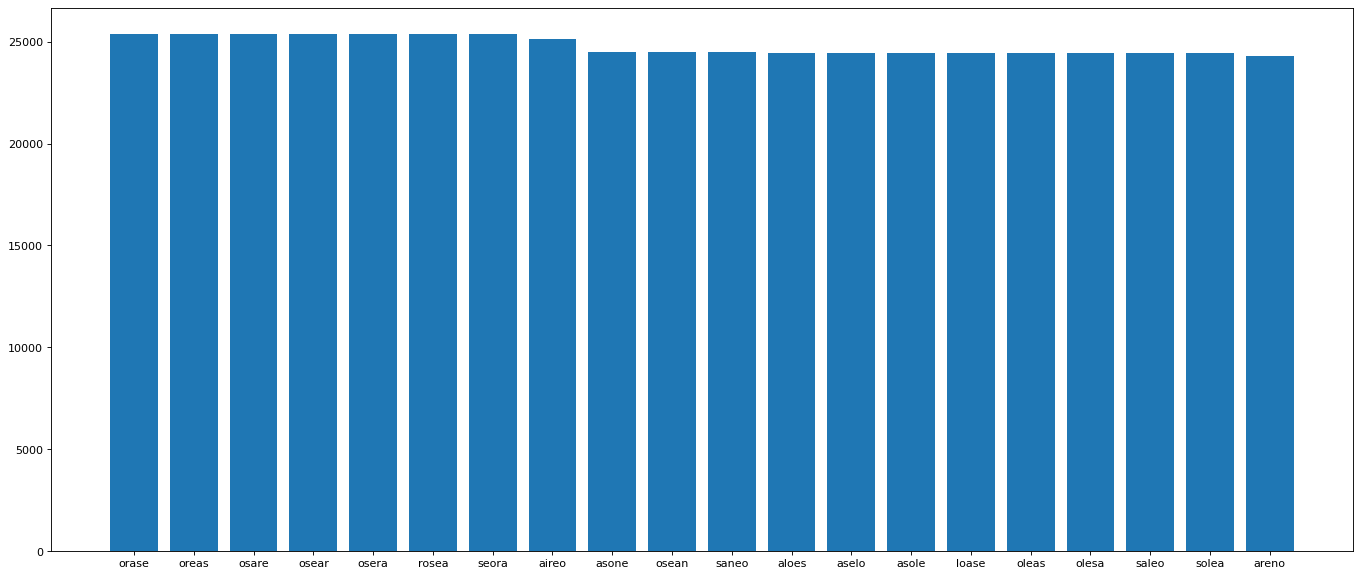

In [45]:
# SORT WORDS BY GIVEN INFORMATION
def print_n_most_informative_remaining_words(number, remaining_words_information):

  sorted_remaining_words_information_keys = list();
  sorted_remaining_words_information_values = list();

  for item in remaining_words_information:
    
    sorted_remaining_words_information_keys.append(item[0]);
    sorted_remaining_words_information_values.append(item[1]);

  figure(figsize=(21, 9), dpi=80)
  plt.bar(sorted_remaining_words_information_keys[:number], sorted_remaining_words_information_values[:number])

print_n_most_informative_remaining_words(20, sorted_remaining_words_information_dict);

In [46]:
# Removes all words that contain grey letters
def apply_grey_filter(remaining_words_list, grey_letters_list):
  filtered_words = remaining_words_list.copy();
  for grey_letter in grey_letters_list:
    filtered_words = [word for word in filtered_words if grey_letter not in word];
  return filtered_words;

# Removes all words that contain yellow letters on yellow positions
def apply_yellow_filter(remaining_words_list, yellow_letters_dict):
  filtered_words = remaining_words_list.copy();
  for yellow_letter in yellow_letters_dict.items():
    filtered_words = [word for word in filtered_words if (yellow_letter[0] in word and
                                                          yellow_letter[0] not in word[yellow_letter[1]])];
  return filtered_words;

# Removes all words that do not contain green letters on green position
def apply_green_filter(remaining_words_list, green_letters_dict):
  filtered_words = remaining_words_list.copy();
  for green_letter in green_letters_dict.items():
    filtered_words = [word for word in filtered_words if green_letter[0] in word[green_letter[1]]];
  return filtered_words;

# Applys filters to remaining words
def filter_words_by_results(remaining_words_list, grey_letters_list, yellow_letters_dict, green_letters_dict):
  filtered_words = remaining_words_list.copy();
  filtered_words = apply_grey_filter(filtered_words, grey_letters_list);
  filtered_words = apply_yellow_filter(filtered_words, yellow_letters_dict);
  filtered_words = apply_green_filter(filtered_words, green_letters_dict);
  return filtered_words;

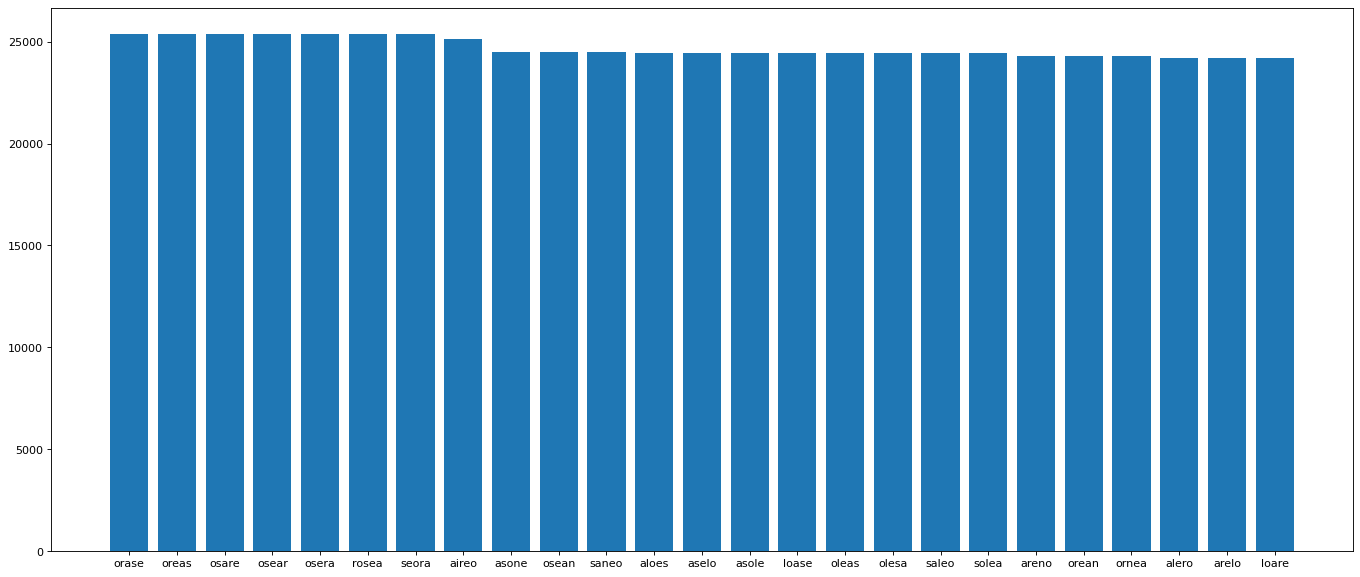

In [47]:
# LET'S PLAY

# INPUT
grey_letters_list = [];
yellow_letters_dict = {};
green_letters_dict = {};

# WORDS LEFT
remaining_words_after_step = filter_words_by_results(words, grey_letters_list, yellow_letters_dict, green_letters_dict);

# LETTERS LEFT
remaining_words_alphabet = get_remaining_words_alphabet(remaining_words_after_step);

# LEFT LETTERS APPEARANCES
alphabet_appearances_in_remaining_words = get_alphabet_appearances_in_remaining_words(remaining_words_after_step, remaining_words_alphabet);

# LEFT WORDS INFORMATION
information_in_remaining_words = get_information_in_remaining_words(remaining_words_after_step, alphabet_appearances_in_remaining_words);

print_n_most_informative_remaining_words(25, information_in_remaining_words);